# What is Pandas
* Pandas is Python's ETL package for structured data
* Built on top of NumPy, designed to mimic the functionality of R dataframes
* Provides a convenient way to handle tabular data
* Can perform all SQL functions, including ```group by``` and <code>join</code>
* Compatibile with many other Data Science packages, including visual packages such as Matploylib and Seaborn
* Defines 2 main data types:
  +  ```pandas.Series```
  + ```pandas.DataFrame```

## Introduction

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import MySQLdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)
b = (17 + np.random.rand(50,1) * 18)
heights = np.random.randint(120, 220, 50).reshape(50, 1)
weights = 2.2 * b + 3.5 * b * (heights - 150)/100

In [3]:
ds_heights = pd.Series(heights.flatten()[:10])
print(ds_heights)

0    162
1    204
2    195
3    188
4    126
5    188
6    167
7    123
8    196
9    172
dtype: int32


In [4]:
ds_heights.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
print(ds_heights.values)

[162 204 195 188 126 188 167 123 196 172]


In [6]:
ds_heights[4]

126

In [7]:
ds_heights[4:9]

4    126
5    188
6    167
7    123
8    196
dtype: int32

In [8]:
ds_heights[[True, False]*5]

0    162
2    195
4    126
6    167
8    196
dtype: int32

In [9]:
ds_heights > 160

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7    False
8     True
9     True
dtype: bool

In [10]:
ds_heights[(ds_heights > 160) & (ds_heights < 200)] = 0 # Values that meet the condition (i.e. True) get returned as 0.
ds_heights # This will update the underlying structure. That it, ds_heights will now have 0 values for values that were between 160 and 200.

0      0
1    204
2      0
3      0
4    126
5      0
6      0
7    123
8      0
9      0
dtype: int32

Not a Number (NaN) is the way pandas/numpy deals with missing information.
The following will return NaN:
 * Empty cells
 * Numbers that are too large/small
 * Missing numbers
 * Numbers that do not evaluate

```DataFrame.mask(x,y)```
<br>Where *x* is a condition when met sets the value to NaN.
<br>Where _y_ is the value it should be set to when condition is met.
<br>
<br>The underlying structure will not be updated.

In [11]:
ds_heights.mask(ds_heights==0)

0      NaN
1    204.0
2      NaN
3      NaN
4    126.0
5      NaN
6      NaN
7    123.0
8      NaN
9      NaN
dtype: float64

In [12]:
ds_heights.mask(ds_heights==0, np.mean(ds_heights))

0     45.3
1    204.0
2     45.3
3     45.3
4    126.0
5     45.3
6     45.3
7    123.0
8     45.3
9     45.3
dtype: float64

In [13]:
print(ds_heights)

0      0
1    204
2      0
3      0
4    126
5      0
6      0
7    123
8      0
9      0
dtype: int32


There are two methods to update strucure when we have NaN:
* using ```inplace=True```, and
* variable reassignment.

In [14]:
ds_heights.mask(ds_heights==0, inplace=True) # Using inplace updates the underlying structure.
# ds_heights = ds_heights.mask(ds_heights==0, np.mean(ds_heights)) # This is the same as the above but using Variable Reassignment.
print(ds_heights)

0      NaN
1    204.0
2      NaN
3      NaN
4    126.0
5      NaN
6      NaN
7    123.0
8      NaN
9      NaN
dtype: float64


ds_heights = ds_heights.mask(ds_heights==0, np.mean(ds_heights))

```variable.where``` is the polar opposite of mask.
<br>Instead of replacing conditions when met, it replaces values when conditions are not met.

In [15]:
ds_heights.where(ds_heights == np.NaN)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64

## Arrays

In [16]:
patients = ['Patient ' + str(i) for i in range (1,11)]
patients

['Patient 1',
 'Patient 2',
 'Patient 3',
 'Patient 4',
 'Patient 5',
 'Patient 6',
 'Patient 7',
 'Patient 8',
 'Patient 9',
 'Patient 10']

In [17]:
'''
We can re-index our data by assigning variable.index to an index
'''
ds_heights.index = patients
ds_heights

Patient 1       NaN
Patient 2     204.0
Patient 3       NaN
Patient 4       NaN
Patient 5     126.0
Patient 6       NaN
Patient 7       NaN
Patient 8     123.0
Patient 9       NaN
Patient 10      NaN
dtype: float64

In [18]:
'''
We can splice between an index using out newly assigned index.
'''
ds_heights['Patient 4':'Patient 8']

Patient 4      NaN
Patient 5    126.0
Patient 6      NaN
Patient 7      NaN
Patient 8    123.0
dtype: float64

In [19]:
'''
We can sort the values.
As you can see, NaN values are not included in the sort.
'''
ds_heights.sort_values()

Patient 8     123.0
Patient 5     126.0
Patient 2     204.0
Patient 1       NaN
Patient 3       NaN
Patient 4       NaN
Patient 6       NaN
Patient 7       NaN
Patient 9       NaN
Patient 10      NaN
dtype: float64

In [20]:
ds_heights.sort_values(ascending=False)

Patient 2     204.0
Patient 5     126.0
Patient 8     123.0
Patient 1       NaN
Patient 3       NaN
Patient 4       NaN
Patient 6       NaN
Patient 7       NaN
Patient 9       NaN
Patient 10      NaN
dtype: float64

In [21]:
'''
We can also do value counts, i.e. how much of each value we have.
By default NaNs are not included in the count.
Using the parameter dropna=False, we can include them as part of the count.
'''
ds_heights.value_counts()

204.0    1
126.0    1
123.0    1
dtype: int64

<AxesSubplot:>

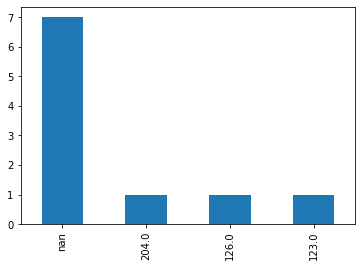

In [22]:
ds_heights.value_counts(dropna=False).plot(kind='bar')

In [23]:
ds_heights['Patient 0'] = 100
ds_heights

Patient 1       NaN
Patient 2     204.0
Patient 3       NaN
Patient 4       NaN
Patient 5     126.0
Patient 6       NaN
Patient 7       NaN
Patient 8     123.0
Patient 9       NaN
Patient 10      NaN
Patient 0     100.0
dtype: float64

In [24]:
# True are missing values whilst False are not missing values.
ds_heights.isna()

Patient 1      True
Patient 2     False
Patient 3      True
Patient 4      True
Patient 5     False
Patient 6      True
Patient 7      True
Patient 8     False
Patient 9      True
Patient 10     True
Patient 0     False
dtype: bool

In [25]:
'''
Pandas recognises Python's "None" value as "Not a Number"
'''
ds_heights['Patient 100'] = None
ds_heights

Patient 1        NaN
Patient 2      204.0
Patient 3        NaN
Patient 4        NaN
Patient 5      126.0
Patient 6        NaN
Patient 7        NaN
Patient 8      123.0
Patient 9        NaN
Patient 10       NaN
Patient 0      100.0
Patient 100     None
dtype: object

In [26]:
ds_heights.isna().value_counts()

True     8
False    4
dtype: int64

In [27]:
# Use the below to sum up the total of missing values.
ds_heights.isna().sum()

8

## Working with Queries
We can perform other transformations on series:

In [28]:
# We are using a dictionary (key:value) method to replace values.
ds_heights = ds_heights.replace(
{
    np.NaN : 0,
    123.0 : 200.0
}
)

In [29]:
'''
We can transform the data using functions.
Functions behave differently with arrays.
We do not need brackets after the function as we are mapping the function over it.
'''
ds_heights = ds_heights * 0.95111

def my_round(x):
    return round(x,2)

ds_heights.map(my_round)

Patient 1        0.00
Patient 2      194.03
Patient 3        0.00
Patient 4        0.00
Patient 5      119.84
Patient 6        0.00
Patient 7        0.00
Patient 8      190.22
Patient 9        0.00
Patient 10       0.00
Patient 0       95.11
Patient 100      0.00
dtype: float64

In [30]:
ds_heights.map(abs)

Patient 1        0.00000
Patient 2      194.02644
Patient 3        0.00000
Patient 4        0.00000
Patient 5      119.83986
Patient 6        0.00000
Patient 7        0.00000
Patient 8      190.22200
Patient 9        0.00000
Patient 10       0.00000
Patient 0       95.11100
Patient 100      0.00000
dtype: float64

In [31]:
'''
We can use lambda to do what the function did, without creating the function.
We have the variable 'x': and what we want to do to that variable.
What we want to return and then vanish.
'''
ds_heights.map(lambda theVariable: round(theVariable,2))

Patient 1        0.00
Patient 2      194.03
Patient 3        0.00
Patient 4        0.00
Patient 5      119.84
Patient 6        0.00
Patient 7        0.00
Patient 8      190.22
Patient 9        0.00
Patient 10       0.00
Patient 0       95.11
Patient 100      0.00
dtype: float64

## Data Frame
* A pandas DataFrame represents a table. It contains:
    * Data in form of rows and columns
    * Row IDS (the index array, i.e. primary key)
    * Column names (ID of the columns)
* A DataFrame is equivalent to a collection of Series with each Series representing a column
* The row indicies (by default) start from 0 and increase by one for each subsquent row, but just like Series they can bve changes to any collection of objects
* Each row index uniquely identifies a particular row. If we reorder the rows, their indicies go with them.

In [32]:
titanic = sns.load_dataset('titanic')

# head/tail defaults as 5 values. We can pass different numbers to get a number of rows.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [34]:
# sample by default provides a single random row.
titanic.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
465,0,3,male,38.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True


In [35]:
# to find all null/NaN values in the dataset, we use:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

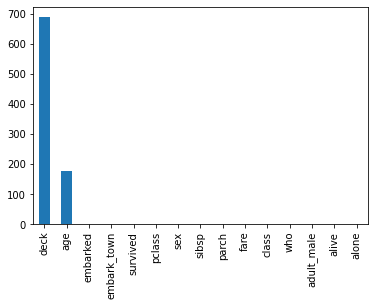

In [36]:
# we can visualise this data:
titanic.isna().sum().sort_values(ascending=False).plot(kind='bar')

In [37]:
# To get a statistical summary of the table:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
# we can view all columns
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# we can view only objects datatypes (strings)
titanic.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [40]:
titanic.describe(include='category')

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


In [41]:
# we can see the name of the columns, number of columns, number of non-null numbers, and the data type.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


There are a vast number of ways that we can read data into Pandas.<br>
* JSON  can be indirectly imported into tables.
* HTML  import a webpage and it will try to put in structured data.
* CSV   any delimited file can be imported.
* SQL   can pass queries directly into SQL databases, set up connections, and pull data.

<br>The below code will show the different datatypes we can read.

In [42]:
methods = pd.Series(dir(pd))
methods[methods.str.contains('read')]

106    read_clipboard
107          read_csv
108        read_excel
109      read_feather
110          read_fwf
111          read_gbq
112          read_hdf
113         read_html
114         read_json
115          read_orc
116      read_parquet
117       read_pickle
118          read_sas
119         read_spss
120          read_sql
121    read_sql_query
122    read_sql_table
123        read_stata
124        read_table
125          read_xml
dtype: object

In [43]:
# first location of entry the 'age' column
titanic.loc[0, 'age']

22.0

In [44]:
# all entries of the 'age' column
titanic.loc[:,'age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [45]:
# all columns in the 10th location 
titanic.loc[9,:]

survived               1
pclass                 2
sex               female
age                 14.0
sibsp                  1
parch                  0
fare             30.0708
embarked               C
class             Second
who                child
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone              False
Name: 9, dtype: object

In [46]:
# all details of the 5th entry to the 10th entry
titanic.loc[4:9,:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [47]:
titanic.loc[4:9,'age':'parch']

,age,sibsp,parch
4,35.0,0,0
5,NaN,0,0
6,54.0,0,0
7,2.0,3,1
8,27.0,0,2
9,14.0,1,0


### Exercise
* What was the least expensive first class ticket?
* Where did they embark?
* Did they survive?

In [48]:
# All the passenger class of 3 (third class passengers)
titanic[titanic.loc[:,'pclass']==3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [49]:
# all the first class passengers sorted by fare, then age.
titanic[titanic.loc[:,'pclass']==1].sort_values(['fare','age']).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
263,0,1,male,40.0,0,0,0.0000,S,First,man,True,B,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
815,0,1,male,NaN,0,0,0.0000,S,First,man,True,B,Southampton,no,True
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
662,0,1,male,47.0,0,0,25.5875,S,First,man,True,E,Southampton,no,True
168,0,1,male,NaN,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
796,1,1,female,49.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True


In [50]:
titanic['costPerYearAlive'] = titanic.loc[:,'fare'] / titanic.loc[:,'age']
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,costPerYearAlive
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.391841
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,8.115102
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.342403
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.565217
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.673857
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,164.728261


In [51]:
titanic.loc[:,'costPerYearAlive'].sort_values(ascending=False).head()

305    164.728261
297     75.775000
386     46.900000
164     39.687500
183     39.000000
Name: costPerYearAlive, dtype: float64

In [52]:
titanic.sort_values('costPerYearAlive',ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,costPerYearAlive
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,164.728261
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,no,False,75.775000
386,0,3,male,1.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False,46.900000
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False,39.687500
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,39.000000


In [53]:
# we can re-name columns:
titanic.rename(
    {'alive': 'not dead'}, axis=1
).head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

## Using GROUP BY

Group table rows into sub-groups given a certain criteria.<br>
We group columns by choosing a category of a column.<p>
If we group by class, we generate a generic data frame group by object.<br>
We get this object because Python and Pandas, do not know how to output a collection of data frames.<br>

In [54]:
titanic.groupby('class').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,costPerYearAlive
class,,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630,4.189522
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217,2.088590
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878,1.597739


In [55]:
# We can use the mean, however that is only useful on numeric data.
# A summary output allows Pandas to use the data in a meaningful way:

grouped_df = titanic.groupby(['class', 'survived']).count()
print(grouped_df)

                 pclass  sex  age  sibsp  parch  fare  embarked  who  \
class  survived                                                        
First  0             80   80   64     80     80    80        80   80   
       1            136  136  122    136    136   136       134  136   
Second 0             97   97   90     97     97    97        97   97   
       1             87   87   83     87     87    87        87   87   
Third  0            372  372  270    372    372   372       372  372   
       1            119  119   85    119    119   119       119  119   

                 adult_male  deck  embark_town  alive  alone  costPerYearAlive  
class  survived                                                                 
First  0                 80    58           80     80     80                64  
       1                136   117          134    136    136               122  
Second 0                 97     3           97     97     97                90  
       1          

In [56]:
# We can group by more than one column, grouping by multiple axis.
# The below groups by class, survival, and where they embarked.
grouped_df = titanic.groupby(['class', 'survived', 'embarked']).count()
grouped_df.loc[:]

pclass  sex  age  sibsp  parch  fare  who  \
class  survived embarked                                              
First  0        C             26   26   21     26     26    26   26   
                Q              1    1    1      1      1     1    1   
                S             53   53   42     53     53    53   53   
       1        C             59   59   53     59     59    59   59   
                Q              1    1    1      1      1     1    1   
                S             74   74   66     74     74    74   74   
Second 0        C              8    8    7      8      8     8    8   
                Q              1    1    1      1      1     1    1   
                S             88   88   82     88     88    88   88   
       1        C              9    9    8      9      9     9    9   
                Q              2    2    1      2      2     2    2   
                S             76   76   74     76     76    76   76   
Third  0        C             41   41   23     41     41    41   41   
                Q             45   45   18     45     45    45   45   
                S            286  286  229    286    286   286  286   
       1        C             25   25   18     25     25    25   25   
                Q             27   27    6     27     27    27   27   
                S             67   67   61     67     67    67   67   

                          adult_male  deck  embark_town  alive  alone  \
class  survived embarked                                                
First  0        C                 26    16           26     26     26   
                Q                  1     1            1      1      1   
                S                 53    41           53     53     53   
       1        C                 59    50           59     59     59   
                Q                  1     1            1      1      1   
                S                 74    64           74     74     74   
Second 0        C                  8     1            8      8      8   
                Q                  1     0            1      1      1   
                S                 88     2           88     88     88   
       1        C                  9     1            9      9      9   
                Q                  2     1            2      2      2   
                S                 76    11           76     76     76   
Third  0        C                 41     0           41     41     41   
                Q                 45     1           45     45     45   
                S                286     5          286    286    286   
       1        C                 25     1           25     25     25   
                Q                 27     0           27     27     27   
                S                 67     5           67     67     67   

                          costPerYearAlive  
class  survived embarked                    
First  0        C                       21  
                Q                        1  
                S                       42  
       1        C                       53  
                Q                        1  
                S                       66  
Second 0        C                        7  
                Q                        1  
                S                       82  
       1        C                        8  
                Q                        1  
                S                       74  
Third  0        C                       23  
                Q                       18  
                S                      229  
       1        C                       18  
                Q                        6  
                S                       61

In [57]:
# We can group by first class passengers by using get_group method and passing it a row entry. 
titanic.groupby('class').get_group('First')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,costPerYearAlive
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.875876
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.517143
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0.960417
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0.457759
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True,1.267857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,1.118174
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,0.151515
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,1.484970
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.578947


In [58]:
# We can search according to certain criteria.
# The below looks at first class passangers, who did not survive.
grouped_df.loc[('First', 0), :]

,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone,costPerYearAlive
embarked,,,,,,,,,,,,,
C,26,26,21,26,26,26,26,26,16,26,26,26,21
Q,1,1,1,1,1,1,1,1,1,1,1,1,1
S,53,53,42,53,53,53,53,53,41,53,53,53,42


In [59]:
# The below looks at First class passangers, who did not survive, embarked from Cherbourg, France
grouped_df.loc['First', 0 , 'C']

pclass              26
sex                 26
age                 21
sibsp               26
parch               26
fare                26
who                 26
adult_male          26
deck                16
embark_town         26
alive               26
alone               26
costPerYearAlive    21
Name: (First, 0, C), dtype: int64

In [60]:
# We can seperate the data by adding conditions.
# the below will show fares greater than 70 (True) and below 70 (False)
titanic.groupby(titanic.loc[:, 'fare']>70).count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,costPerYearAlive
fare,,,,,,,,,,,,,,,,
False,786,786,786,617,786,786,786,786,786,786,786,117,786,786,786,617
True,105,105,105,97,105,105,105,103,105,105,105,86,103,105,105,97


## Merging and Joining

* Use ```DataFrame.merge()``` as a general method of joining two dataframes:
    * ```dataframe_A.merge(dataframe_B, left_on = 'Name', right_on = 'Customer', how = 'inner'```
    * ```dataframe_A.merge(dataframe_B, left_on = 'Name', right_on = 'Customer', how = 'outer'```
    * ```dataframe_A.merge(dataframe_B, left_on = 'Name', right_on = 'Customer', how = 'left'```
    * ```dataframe_A.merge(dataframe_B, left_on = 'Name', right_on = 'Customer', how = 'right'```
<p>

* If we want to merge on the row indicies, then ```DataFrame.join()``` offers a simpler interface:
    * ```datafram_A.join(dataframe_B, how='inner')```
    * Works with series
    * Joins on the primary keys of the two dataframes (series)
    

In [61]:
students = ['Alice', 'Derek', 'Alex', 'Lemon']
scores = [90, 80, 65, 50]

contacts = pd.DataFrame(
    {
        'name'  : ['Alice', 'Derek'],
        'tel'   : ['+44 1234 567890', '+44 9876 543210']
    }
)

examResults = pd.DataFrame(
    {
        "name"  : students,
        "scores": scores    
    }
)

In [62]:
# We need a table that we want to merge the dataframes.
examResults.merge(contacts, on='name')

,name,scores,tel
0,Alice,90,+44 1234 567890
1,Derek,80,+44 9876 543210


In [63]:
# If we want to join on columns that have different headings, we are able to specify which columns to join on.
examResults.merge(contacts, on = 'name', how = 'outer')

,name,scores,tel
0,Alice,90,+44 1234 567890
1,Derek,80,+44 9876 543210
2,Alex,65,NaN
3,Lemon,50,NaN


In [64]:
examResults.merge(contacts, left_on = 'name', right_on = 'name', how = 'inner')

,name,scores,tel
0,Alice,90,+44 1234 567890
1,Derek,80,+44 9876 543210
